In [ ]:
import os, glob
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Recommend System"

import pandas as pd
from pandas import DataFrame,Series
import json
import csv

Mounted at /content/drive


In [ ]:
os.chdir(path)
os.listdir(path)

['recommendation-systems-with-the-elastic-stack-additional-resources.pdf',
 '2827872.pdf',
 'top10000_movies.csv',
 'upcoming_movies.csv',
 '.ipynb_checkpoints',
 'result_data.csv',
 'y.csv',
 'no_missing_result.csv',
 'no_missing_result_week10.csv',
 'genre.csv',
 'no_missing_result_week10_2.csv',
 'posters_final',
 'movie_list_week10.pckl',
 'top10000_movies_week10.csv',
 'train_top10000_week10.csv',
 'upcoming_movie_list_week10.pckl',
 'upcoming_movies_week10.csv',
 'train_upcoming_week10.csv',
 'result_1.csv',
 'result.csv',
 'no_missing_result_week10_3.csv',
 'Processed_data.csv']

In [ ]:
cc=pd.read_csv('no_missing_result_week10_3.csv')
cc

,Unnamed: 0,Unnamed: 0.1,title,overview,genre_ids,id,popularity
0,0,0,Shang-Chi and the Legend of the Ten Rings,Shang-Chi must confront the past he thought he...,"[28, 12, 14]",566525,6665.737
1,1,1,Venom: Let There Be Carnage,After finding a host body in investigative rep...,"[878, 28, 12]",580489,4141.331
2,2,2,No Time to Die,Bond has left active service and is enjoying a...,"[12, 28, 53]",370172,3491.344
3,3,3,Clifford the Big Red Dog,As Emily struggles to fit in at home and at sc...,"[16, 35, 10751]",585245,3269.139
4,4,4,Apex,Ex-cop James Malone is serving a life sentence...,"[28, 53, 878]",763164,1863.698
...,...,...,...,...,...,...,...
10293,10009,10009,Guilty as Sin,Before a criminal lawyer knows what has happen...,"[18, 53, 9648]",4916,11.137
10294,10010,10010,Anything for Her,Lisa and Julien are married and lead a happy u...,"[18, 53]",14556,11.135
10295,10011,10011,What We Become,A family of four is quarantined in their home ...,"[27, 53]",356326,11.133
10296,10012,10012,Beyond Skyline,Detective Mark Corley storms his way onto an a...,"[28, 878, 12, 27]",271404,11.133


In [ ]:
dx=pd.read_csv("Processed_data.csv")
dx

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
0,0,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,28,6665.737,Action
1,1,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,12,6665.737,Adventure
2,2,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,14,6665.737,Fantasy
3,3,Venom: Let There Be Carnage,580489,After finding a host body in investigative rep...,878,4141.331,Science Fiction
4,4,Venom: Let There Be Carnage,580489,After finding a host body in investigative rep...,28,4141.331,Action
...,...,...,...,...,...,...,...
26281,26281,Beyond Skyline,271404,Detective Mark Corley storms his way onto an a...,878,11.133,Science Fiction
26282,26282,Beyond Skyline,271404,Detective Mark Corley storms his way onto an a...,12,11.133,Adventure
26283,26283,Beyond Skyline,271404,Detective Mark Corley storms his way onto an a...,27,11.133,Horror
26284,26284,Holidays,323262,An anthology feature film that puts a uniquely...,35,11.132,Comedy


In [ ]:
lab=dx.drop_duplicates(subset=['label'],keep='first',inplace=False)
lab=lab[['label']].reset_index(drop=True)
lab

,label
0,Action
1,Adventure
2,Fantasy
3,Science Fiction
4,Thriller
5,Animation
6,Comedy
7,Family
8,Music
9,Crime


In [ ]:
import numpy as np

In [ ]:
nr_ids = np.unique(lab)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
visGrid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
for i in tqdm(range(len(lab))):
    label=lab.loc[i,'label']
    ds=dx[dx['label']==label]
    lab.loc[i,'count']=len(ds)
lab 


  0%|          | 0/19 [00:00<?, ?it/s]

,label,no,count
0,Action,0.0,2653.0
1,Adventure,1.0,1759.0
2,Fantasy,2.0,1255.0
3,Science Fiction,3.0,1255.0
4,Thriller,4.0,2636.0
5,Animation,5.0,1343.0
6,Comedy,6.0,3139.0
7,Family,7.0,1375.0
8,Music,8.0,316.0
9,Crime,9.0,1289.0


In [ ]:
lab1=lab.sort_values(by=['count'], ascending=True)
lab1

,label,no,count
14,Western,14.0,146.0
18,TV Movie,18.0,246.0
17,Documentary,17.0,309.0
13,War,13.0,313.0
8,Music,8.0,316.0
15,History,15.0,436.0
10,Mystery,10.0,802.0
2,Fantasy,2.0,1255.0
3,Science Fiction,3.0,1255.0
9,Crime,9.0,1289.0


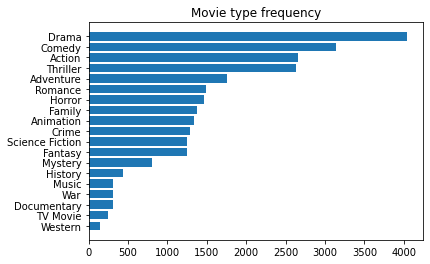

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
dis=lab1
a = dis['label']
b = dis['count']
plt.barh(a, b)  
plt.title('Movie type frequency')
plt.show()

In [ ]:
mystery=dx.loc[dx['label'] == 'Mystery']
mystery

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
57,57,Zone 414,675319,In the near future on a colony of state-of-the...,9648,507.146,Mystery
59,59,Last Night in Soho,576845,"A young girl, passionate about fashion design,...",9648,489.888,Mystery
92,92,Malignant,619778,Madison is paralyzed by shocking visions of gr...,9648,254.134,Mystery
124,124,Spiral: From the Book of Saw,602734,Working in the shadow of an esteemed police ve...,9648,139.692,Mystery
190,190,Antlers,516329,A young teacher discovers that her troubled st...,9648,52.093,Mystery
...,...,...,...,...,...,...,...
26135,26135,Southland Tales,4723,Set in the futuristic landscape of Los Angeles...,9648,11.171,Mystery
26177,26177,Basic,10782,A DEA agent investigates the disappearance of ...,9648,11.161,Mystery
26188,26188,Bordertown,4351,American corporations are using the North Amer...,9648,11.156,Mystery
26268,26268,Enigma,10491,The story of the WWII project to crack the cod...,9648,11.137,Mystery


In [ ]:
dx.loc[(dx['title'] == 'Zone 414')]

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
55,55,Zone 414,675319,In the near future on a colony of state-of-the...,878,507.146,Science Fiction
56,56,Zone 414,675319,In the near future on a colony of state-of-the...,53,507.146,Thriller
57,57,Zone 414,675319,In the near future on a colony of state-of-the...,9648,507.146,Mystery


In [ ]:
dx.loc[(dx['label'] == 'Drama') & (dx['popularity']>10)].head(20)

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
78,78,Mobile Suit Gundam Hathaway,685274,"After Char's rebellion, Hathaway Noa leads an ...",18,340.001,Drama
82,82,King Richard,614917,The TRUE STORY of how Richard Williams served ...,18,331.839,Drama
109,109,The Ice Road,646207,After a remote diamond mine collapses in far n...,18,190.415,Drama
114,114,House of Gucci,644495,"When Patrizia Reggiani, an outsider from humbl...",18,159.492,Drama
131,131,Sing 2,438695,Buster and his new cast now have their sights ...,18,137.539,Drama
135,135,The Green Knight,559907,An epic fantasy adventure based on the timeles...,18,95.763,Drama
138,138,Titane,630240,A woman with a metal plate in her head from a ...,18,93.425,Drama
149,149,The Last Duel,617653,King Charles VI declares that Knight Jean de C...,18,89.248,Drama
156,156,Azor,659954,"Yvan De Wiel, a private banker from Geneva, is...",18,80.879,Drama
158,158,The French Dispatch,542178,The quirky staff of an American magazine based...,18,76.690,Drama


In [ ]:
dx.loc[dx['title'] == 'Shang-Chi and the Legend of the Ten Rings']

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
0,0,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,28,6665.737,Action
1,1,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,12,6665.737,Adventure
2,2,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,14,6665.737,Fantasy


In [ ]:
dx.loc[dx['label'] == 'Action']

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
0,0,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,28,6665.737,Action
4,4,Venom: Let There Be Carnage,580489,After finding a host body in investigative rep...,28,4141.331,Action
7,7,No Time to Die,370172,Bond has left active service and is enjoying a...,28,3491.344,Action
12,12,Apex,763164,Ex-cop James Malone is serving a life sentence...,28,1863.698,Action
15,15,Spider-Man: No Way Home,634649,Peter Parker is unmasked and no longer able to...,28,1782.830,Action
...,...,...,...,...,...,...,...
26202,26202,Operation Petticoat,9660,A World War II submarine commander finds himse...,28,11.154,Action
26213,26213,Crying Freeman,9501,A lethal assassin for a secret Chinese organis...,28,11.152,Action
26217,26217,The Foreigner,18248,This story is about a freelance agent (Seagal)...,28,11.151,Action
26263,26263,The Beastmaster,16441,"Dar, is the son of a king, who is hunted by a ...",28,11.139,Action


In [ ]:
cc.head(52)
# Select the top 50 most popular movies and analyze the genre collection of these popular movies

,Unnamed: 0,Unnamed: 0.1,title,overview,genre_ids,id,popularity
0,0,0,Shang-Chi and the Legend of the Ten Rings,Shang-Chi must confront the past he thought he...,"[28, 12, 14]",566525,6665.737
1,1,1,Venom: Let There Be Carnage,After finding a host body in investigative rep...,"[878, 28, 12]",580489,4141.331
2,2,2,No Time to Die,Bond has left active service and is enjoying a...,"[12, 28, 53]",370172,3491.344
3,3,3,Clifford the Big Red Dog,As Emily struggles to fit in at home and at sc...,"[16, 35, 10751]",585245,3269.139
4,4,4,Apex,Ex-cop James Malone is serving a life sentence...,"[28, 53, 878]",763164,1863.698
5,5,5,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,"[28, 12, 878]",634649,1782.830
6,6,6,Dune,"Paul Atreides, a brilliant and gifted young ma...","[878, 12]",438631,1485.963
7,7,7,Free Guy,A bank teller called Guy realizes he is a back...,"[35, 28, 12, 878]",550988,1439.169
8,8,8,Encanto,"The tale of an extraordinary family, the Madri...","[12, 16, 35, 10751, 14, 10402]",568124,831.356
9,9,9,Gunpowder Milkshake,In her turbulent life as a professional assass...,"[28, 53, 80]",574060,749.184


In [ ]:
dx.loc[dx['popularity']>89]

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
0,0,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,28,6665.737,Action
1,1,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,12,6665.737,Adventure
2,2,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,14,6665.737,Fantasy
3,3,Venom: Let There Be Carnage,580489,After finding a host body in investigative rep...,878,4141.331,Science Fiction
4,4,Venom: Let There Be Carnage,580489,After finding a host body in investigative rep...,28,4141.331,Action
...,...,...,...,...,...,...,...
2481,2481,That's My Boy,87428,"While in his teens, Donny fathered a son, Todd...",18,89.371,Drama
2482,2482,Porno,197158,Three tales of the erotic: Two young ladies ex...,18,89.352,Drama
2483,2483,The Twilight Saga: Breaking Dawn - Part 1,50619,The new found married bliss of Bella Swan and ...,12,89.166,Adventure
2484,2484,The Twilight Saga: Breaking Dawn - Part 1,50619,The new found married bliss of Bella Swan and ...,14,89.166,Fantasy


In [ ]:
dx=dx.loc[dx['popularity']>89]

In [ ]:
for i in range(len(lab)):
    lab.loc[i,'no']=i
movie=dx.drop_duplicates(subset=['id'],keep='first',inplace=False)
movie=movie[['id']].reset_index(drop=True)
for i in tqdm(range(0,len(movie))):
    id=movie.loc[i,'id']
    dxx=dx[dx['id']==id].reset_index(drop=True)
    for j in range(len(dxx)):
        for k in range(len(dxx)):
            labelj=dxx.loc[j,'label']
            laj=lab[lab['label']==dxx.loc[j,'label']].reset_index(drop=True)
            lak=lab[lab['label']==dxx.loc[k,'label']].reset_index(drop=True)
            noj=int(laj.loc[0,'no'])
            nok=int(lak.loc[0,'no'])
            visGrid[noj][nok]=visGrid[noj][nok]+1

  0%|          | 0/545 [00:00<?, ?it/s]

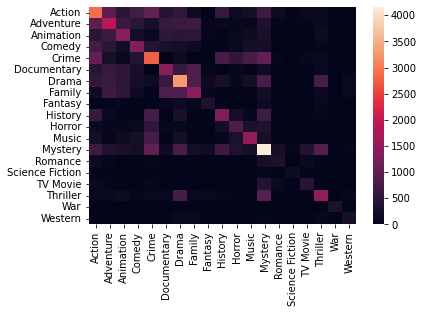

In [ ]:
import seaborn as sns
annot_lookup = []
for i in range(len(nr_ids)):
    annot_lookup.append(nr_ids[i])
sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

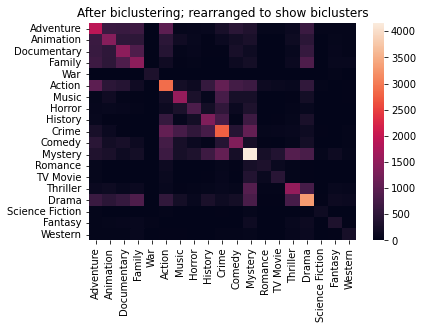

In [ ]:
from sklearn.cluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(nr_ids[i])

sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [ ]:
lab2=dx.drop_duplicates(subset=['label'],keep='first',inplace=False)
lab2=lab2[['label']].reset_index(drop=True)
lab2

,label
0,Action
1,Adventure
2,Fantasy
3,Science Fiction
4,Thriller
5,Animation
6,Comedy
7,Family
8,Music
9,Crime


In [ ]:
for i in tqdm(range(len(lab2))):
    label=lab.loc[i,'label']
    ds=dx[dx['label']==label]
    lab2.loc[i,'count']=len(ds)

lab2=lab2.sort_values(by=['count'], ascending=True)
lab2

  0%|          | 0/19 [00:00<?, ?it/s]

,label,count
14,Western,5.0
13,War,8.0
17,TV Movie,8.0
15,History,9.0
18,Documentary,10.0
8,Music,10.0
10,Mystery,29.0
16,Romance,45.0
9,Crime,55.0
11,Horror,74.0


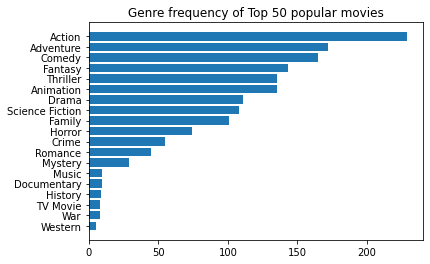

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
dis=lab2
a = dis['label']
b = dis['count']
plt.barh(a, b)  
plt.title('Genre frequency of Top 50 popular movies')
plt.show()

In [205]:
A=['Action', 'Music', 'Horror', 'History', 'Crime', 'Comedy', 'Mystery']
B=['Adventure', 'Animation', 'Documentary', 'Family']
C=['Action', 'Adventure', 'Comedy', 'Fantasy']
# list C included most popular label Top 4

In [196]:
i=input('Select the genre you interested:')

Select the genre you interested:War


In [207]:
from random import choice
if i in A:
  x=choice(A)
  print(x)
elif i in B: 
  x=choice(B)
  print(x)
else: 
  x=choice(C)
  print(x)

Fantasy


In [208]:
print('x=', x)
print('i=', i)


x= Fantasy
i= War


In [210]:
data1=dx.loc[(dx['label'] == x)].head(10)
data1

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
2,2,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,14,6665.737,Fantasy
28,28,Encanto,568124,"The tale of an extraordinary family, the Madri...",14,831.356,Fantasy
36,36,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,635302,"Tanjirō Kamado, joined with Inosuke Hashibira,...",14,742.851,Fantasy
38,38,Jungle Cruise,451048,Dr. Lily Houghton enlists the aid of wisecrack...,14,701.286,Fantasy
42,42,Ghostbusters: Afterlife,425909,When a single mom and her two kids arrive in a...,14,672.799,Fantasy
45,45,The Suicide Squad,436969,"Supervillains Harley Quinn, Bloodsport, Peacem...",14,619.722,Fantasy
64,64,The Croods: A New Age,529203,"Searching for a safer habitat, the prehistoric...",14,466.977,Fantasy
75,75,Ainbo: Spirit of the Amazon,588921,An epic journey of a young hero and her Spirit...,14,365.532,Fantasy
121,121,How the Grinch Stole Christmas,8871,Inside a snowflake exists the magical land of ...,14,152.961,Fantasy
136,136,The Green Knight,559907,An epic fantasy adventure based on the timeles...,14,95.763,Fantasy


In [211]:
data2=dx.loc[(dx['label'] == i)].head(10)
data2

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
95,95,Zeros and Ones,762433,Called to Rome to stop an imminent terrorist b...,10752,239.522,War
1092,1092,Amina,885110,"In 16th-century Zazzau, now Zaria, Nigeria, Am...",10752,2047.062,War
1457,1457,Hacksaw Ridge,324786,"WWII American Army Medic Desmond T. Doss, who ...",10752,214.500,War
2031,2031,Justice Society: World War II,736069,When the Flash finds himself dropped into the ...,10752,113.486,War
2081,2081,Fury,228150,"In the last months of World War II, as the All...",10752,109.574,War
2132,2132,Inglourious Basterds,16869,"In Nazi-occupied France during World War II, a...",10752,106.611,War
2285,2285,The Forgotten Battle,633515,November 1944. On the flooded isle of Walchere...,10752,98.405,War
2400,2400,Special Forces,74513,Afghanistan. War correspondent Elsa Casanova i...,10752,92.834,War


In [212]:
if x!=i:
  frames = [data1, data2]
  result = pd.concat(frames)
else: result = dx.loc[(dx['label'] == i)].head(20)

In [213]:
result

,Unnamed: 0,title,id,overview,genre_ids,popularity,label
2,2,Shang-Chi and the Legend of the Ten Rings,566525,Shang-Chi must confront the past he thought he...,14,6665.737,Fantasy
28,28,Encanto,568124,"The tale of an extraordinary family, the Madri...",14,831.356,Fantasy
36,36,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,635302,"Tanjirō Kamado, joined with Inosuke Hashibira,...",14,742.851,Fantasy
38,38,Jungle Cruise,451048,Dr. Lily Houghton enlists the aid of wisecrack...,14,701.286,Fantasy
42,42,Ghostbusters: Afterlife,425909,When a single mom and her two kids arrive in a...,14,672.799,Fantasy
45,45,The Suicide Squad,436969,"Supervillains Harley Quinn, Bloodsport, Peacem...",14,619.722,Fantasy
64,64,The Croods: A New Age,529203,"Searching for a safer habitat, the prehistoric...",14,466.977,Fantasy
75,75,Ainbo: Spirit of the Amazon,588921,An epic journey of a young hero and her Spirit...,14,365.532,Fantasy
121,121,How the Grinch Stole Christmas,8871,Inside a snowflake exists the magical land of ...,14,152.961,Fantasy
136,136,The Green Knight,559907,An epic fantasy adventure based on the timeles...,14,95.763,Fantasy
